In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None) # Setting this to none so all columns are displayed

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pd.read_csv(r"C:\Users\harma\Downloads\startup_data.csv")
start_up = df

In [4]:
# Checks if we have columns with null values and splits them into those having categorical values and numeric values

def check_for_null_values(df):
    total_columns_with_null_values = dict(df.isnull().sum()[df.isnull().sum() > 0])
    if len(total_columns_with_null_values) > 0:
#         list_of_columns_with_null_values = list(dict(df.isnull().sum()[df.isnull().sum() > 0]))
        categorical_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes('object'))}
        numeric_columns_with_null_values = {i : df[i].isnull().sum() for i in list(df.select_dtypes(np.number))}
        print("The categorical null values are: \n\n{}\n\nThe numeric null values are: \n\n{}\n\n".format(categorical_columns_with_null_values, numeric_columns_with_null_values))
    else:
        print("The dataset has no null values")

check_for_null_values(df)

The dataset has no null values


In [5]:
# Used for converting the categorical variable (State) into numeric form so that we can feed it to the model

label_encoder = LabelEncoder()

def Encoding(df):
    columns_with_categorical_values = list(df.select_dtypes('object'))
    for column in columns_with_categorical_values:
        df[column] = label_encoder.fit_transform(df[column])
    display(df)

Encoding(df)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [6]:
# Splitting the dataset into training and testing data (using Random Sampling)

def Sampling(df, target_variable):
    global Train, Test, Train_X, Test_X, Train_Y, Test_Y
    Train, Test = train_test_split(df, test_size = 0.2, random_state = None)
    Train_X = Train.drop(columns = [target_variable])
    Train_Y = Train[target_variable].reset_index(drop = True)
    Test_X = Test.drop(columns = [target_variable])
    Test_Y = Test[target_variable].reset_index(drop = True)
    
    print ("The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : \n")
    print ("Train Data = {}\n\nTest Data = {}\n\nTrain_X Data = {}\n\nTrain_Y Data = {}\n\nTest_X Data = {}\n\nTest_Y Data = {}".format(Train.shape , Test.shape , Train_X.shape , Train_Y.shape , Test_X.shape , Test_Y.shape))

Sampling(df,'Profit')

The shapes of sampled datasets are (after standard sampling ratio = 0.2 test size ) : 

Train Data = (40, 5)

Test Data = (10, 5)

Train_X Data = (40, 4)

Train_Y Data = (40,)

Test_X Data = (10, 4)

Test_Y Data = (10,)


In [7]:
parameters = {'fit_intercept' : [True, False], 'copy_X' : [True, False]}

linear_regressor = LinearRegression()

grid_search = GridSearchCV(linear_regressor, parameters)
grid_search.fit(Train_X, Train_Y)

print('Best hyperparameters: ', grid_search.best_params_)

Best hyperparameters:  {'copy_X': True, 'fit_intercept': True}


<Axes: xlabel='R&D Spend', ylabel='Count'>

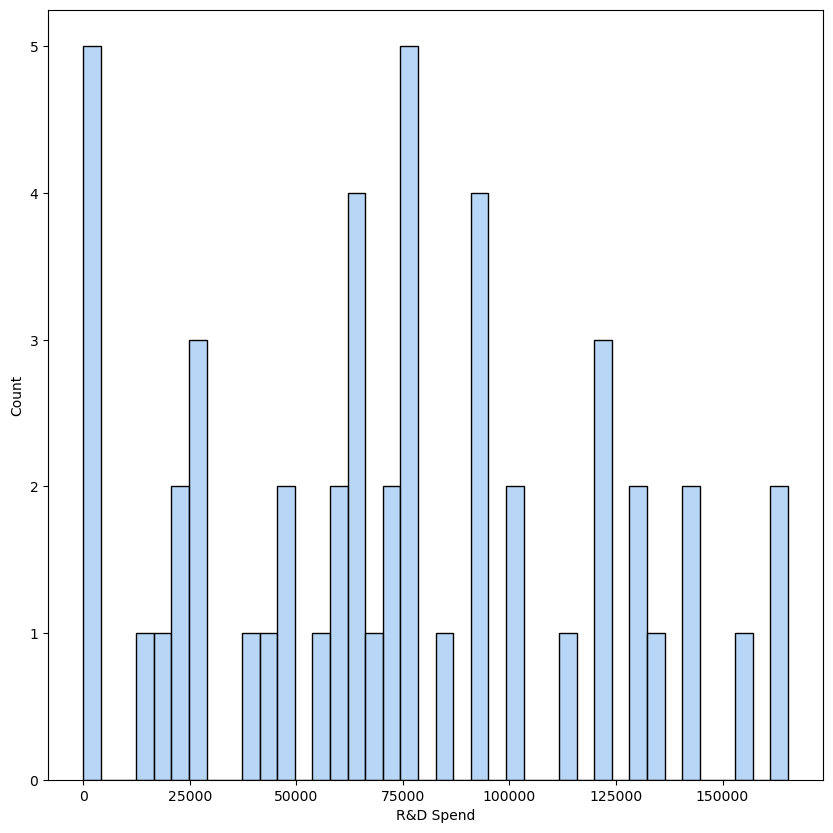

<Axes: xlabel='Administration', ylabel='Count'>

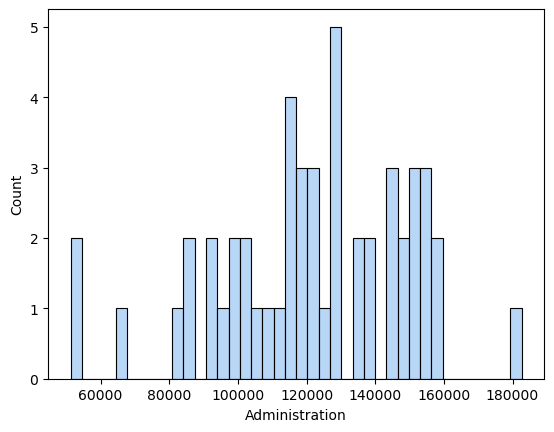

<Axes: xlabel='Marketing Spend', ylabel='Count'>

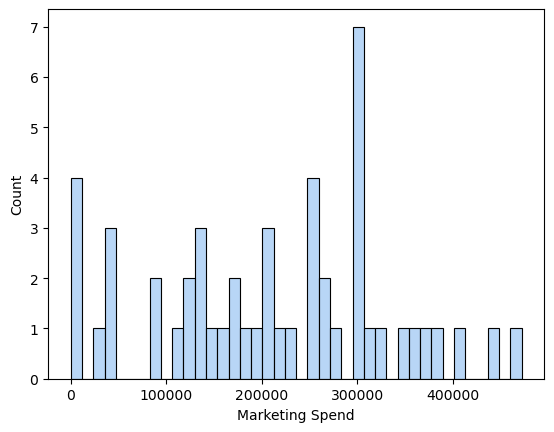

<Axes: xlabel='State', ylabel='Count'>

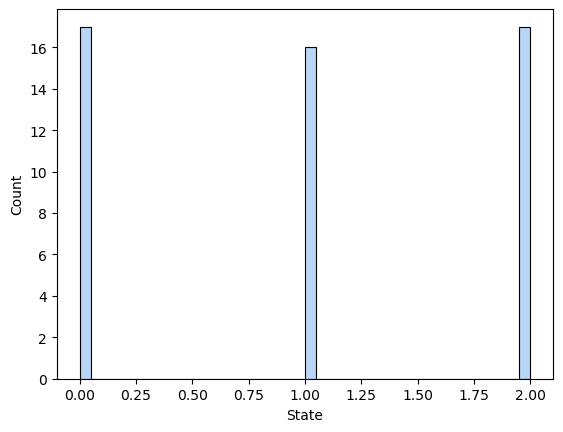

<Axes: xlabel='Profit', ylabel='Count'>

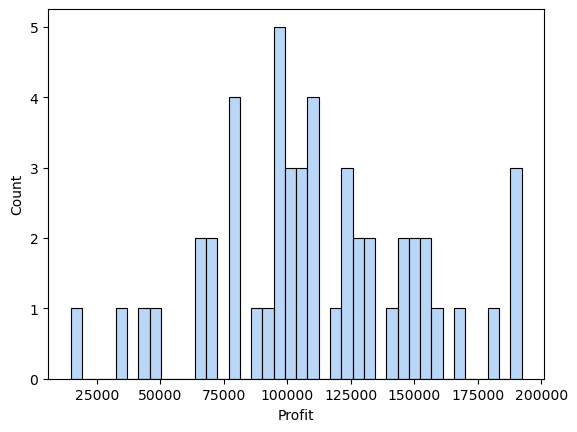

In [8]:
def Plots(df):
    sns.set_palette("pastel")
    plt.figure(figsize = (10, 10))
    for i in list(df.select_dtypes(np.number).columns):
        display(sns.histplot(x = i, data = df, bins = 40))
        plt.show()
        print(" ")
        
Plots(start_up)

In [9]:
def Statistics(df):
    for i in list(df.select_dtypes(np.number).columns):
        global mean, median, standard_deviation, kurtosis
        mean = np.mean(df[i])
        median = np.median(df[i])
        standard_deviation = np.std(df[i])
        kurtosis = df[i].kurt() + 3
        
        print('\n\nColumn -=-=-=-=> ', i)
        print('\n\nMean = {}\n\nMedian = {}\n\nStandard Deviation = {}\n\nKurtosis = {}'.format(mean, median, standard_deviation, kurtosis))
        
        if mean != median:
            if mean > median:
                print('\nRight Skewed')
            else:
                print('\nLeft Skewed')
                
        if kurtosis > 3:
            print('\nThe distribution is Leptokurtic')
        else:
            print('\nThe distribution is Platykurtic\n')
        print("-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

Statistics(start_up)
            



Column -=-=-=-=>  R&D Spend


Mean = 73721.6156

Median = 73051.08

Standard Deviation = 45440.915562565344

Kurtosis = 2.2385354431575326

Right Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Administration


Mean = 121344.63960000001

Median = 122699.795

Standard Deviation = 27736.20965129446

Kurtosis = 3.225071135368654

Left Skewed

The distribution is Leptokurtic
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Marketing Spend


Mean = 211025.09780000002

Median = 212716.24

Standard Deviation = 121061.23118271727

Kurtosis = 2.3282988718702486

Left Skewed

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  State


Mean = 1.0

Median = 1.0

Standard Deviation = 0.8246211251235321

Kurtosis = 1.4361702127659575

The distribution is Platykurtic

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-


Column -=-=-=-=>  Profit


Mean = 112012.63920000002

Median = 

<Axes: >

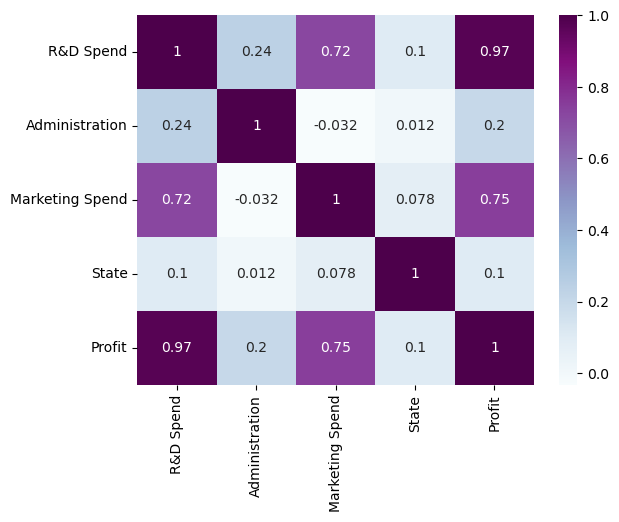

In [10]:
correlation = df.corr()
set_corr = set(correlation.values[(correlation > 0.5) | (correlation < -0.5)])
set_corr.remove(1.0)
sns.color_palette('pastel')
sns.heatmap(df.corr(), cmap = "BuPu", annot = True)

In [12]:
a = df.iloc[: , : - 1]
vif=pd.DataFrame()
vif['Variables'] = a.columns
vif['vif_values'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif.sort_values('vif_values', ascending = False)

,Variables,vif_values
0,R&D Spend,8.386322
2,Marketing Spend,7.674608
1,Administration,4.815916
3,State,2.382637


In [14]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
linear_regressor.fit(Train_X, Train_Y)

LinearRegression()

In [41]:
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
39,50167.786276,35673.41,-14494.376276,14494.376276,40.630756
13,50000.114790,64926.08,14925.965210,14925.965210,22.989167
2,60358.006229,49490.75,-10867.256229,10867.256229,21.958156
10,51782.242748,42559.73,-9222.512748,9222.512748,21.669575
25,77835.127372,90708.19,12873.062628,12873.062628,14.191731
23,70216.113937,81229.06,11012.946063,11012.946063,13.557889
20,61788.901267,69758.98,7970.078733,7970.078733,11.425165
19,147331.595268,132602.65,-14728.945268,14728.945268,11.107580
4,127908.587595,141585.52,13676.932405,13676.932405,9.659838
8,142373.065797,129917.04,-12456.025797,12456.025797,9.587677


In [42]:
coefficients = pd.DataFrame()
columns = list(df.columns)
columns.remove('Profit')
coefficients['Values'] = linear_regressor.coef_
coefficients['Columns'] = columns
coefficients

,Values,Columns
0,0.745957,R&D Spend
1,-0.007812,Administration
2,0.029543,Marketing Spend
3,-1336.290680,State


In [43]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 95.48331043918286 and the adjusted value is 94.96711734651804


In [44]:
print("The mean of the error is: ", np.mean(Model.Error))

The mean of the error is:  -8.913048077374697e-12


In [45]:
print("The mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of absolute error is:  5496.825119708087


(array([ 3.,  2.,  1.,  6., 10.,  6.,  3.,  3.,  3.,  3.]),
 array([-14728.94526847, -11763.45422058,  -8797.96317269,  -5832.47212481,
         -2866.98107692,     98.50997096,   3064.00101885,   6029.49206673,
          8994.98311462,  11960.47416251,  14925.96521039]),
 <BarContainer object of 10 artists>)

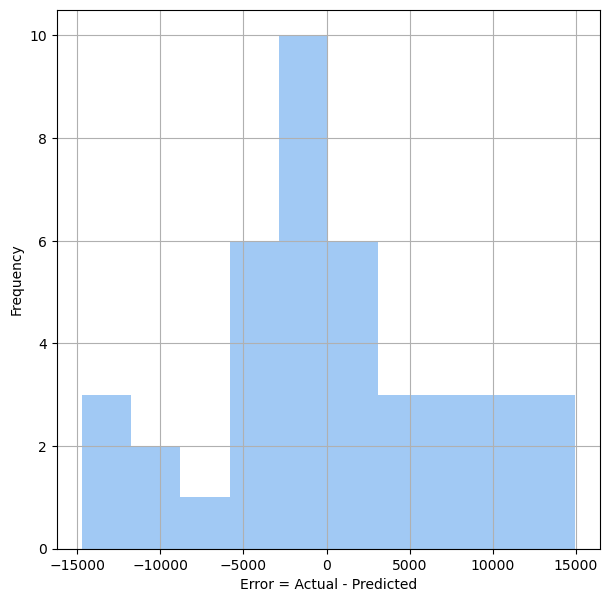

In [46]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

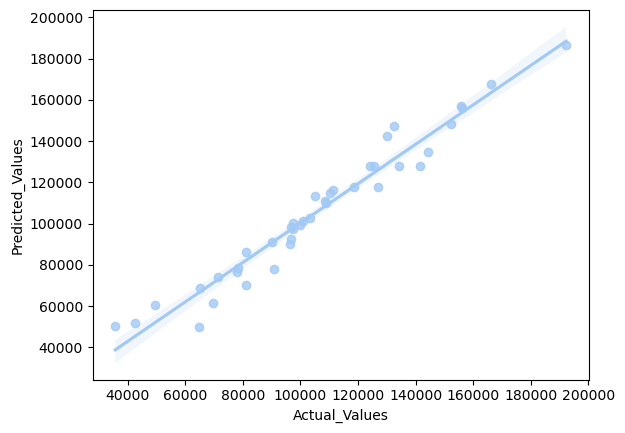

In [47]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [48]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 
MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

The mean square value of error test is:  222201532.1136772

The mean square value of error train is:  52117421.65796189


In [49]:
RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error)))) 

The root mean square value of error test is:  14906.425866507276

root mean square value of error train is:  7219.2396869727145


In [51]:
MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

The mean absolute percentage error (of test) is:  30.806542020891207

The mean absolute percentage error (of train) is:  6.622510455491502


In [52]:
print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

Accuracy on train data is:  69.19345797910879

Accuracy on test data is:  93.37748954450849


In [53]:
def Quartiles(df, y, k):
    global Lower, Upper, Lower_Outliers, Upper_Outliers
    Lower = df[y].quantile(q = 0.25)
    Upper = df[y].quantile(q = 0.75)
    IQR = Upper - Lower
    Lower_Outliers =  Lower - k * IQR 
    Upper_Outliers =  Upper + k * IQR 
    df.drop(labels = list(df [df[y] >= Upper_Outliers].index), inplace = True)
    df.drop(labels = list(df[df[y] <= Lower_Outliers].index), inplace = True)
    df.reset_index(drop = True, inplace = True)
Quartiles(df, 'Profit', 0.75) ## K = 1 becasue the data is not vast

In [83]:
linear_regressor = LinearRegression(copy_X = True, fit_intercept = True)
Train, Test = train_test_split(df, test_size = 0.2, random_state = None)
Train_X = Train.drop(columns = ['Profit'])
Train_Y = Train['Profit'].reset_index(drop = True)
Test_X = Test.drop(columns = ['Profit'])
Test_Y = Test['Profit'].reset_index(drop = True)
linear_regressor.fit(Train_X, Train_Y)
Model = pd.DataFrame()
Model['Predicted_Values'] = linear_regressor.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Pct'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Pct', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Pct
22,78911.825589,90708.19,11796.364411,11796.364411,13.004740
24,142224.106577,129917.04,-12307.066577,12307.066577,9.473020
11,88516.620498,81005.76,-7510.860498,7510.860498,9.272008
6,144845.469263,132602.65,-12242.819263,12242.819263,9.232711
4,133648.536944,146121.95,12473.413056,12473.413056,8.536303
30,70642.280455,65200.33,-5441.950455,5441.950455,8.346508
1,116663.014558,126992.93,10329.915442,10329.915442,8.134245
13,75176.779388,81229.06,6052.280612,6052.280612,7.450881
3,76539.672321,71498.49,-5041.182321,5041.182321,7.050754
18,112368.936403,105008.31,-7360.626403,7360.626403,7.009566


In [85]:
r2 = linear_regressor.score(Train_X, Train_Y)
p = Train_X.shape[1]
n = Train_X.shape[0]
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
print("The coefficient of determinant is: {} and the adjusted value is {}".format(r2 * 100, adj_r2 * 100))

The coefficient of determinant is: 95.12253091221582 and the adjusted value is 94.42574961396095


In [86]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  -3.086769896926302e-12

The mean of absolute error is:  5062.8385310614585


(array([2., 2., 4., 4., 6., 4., 3., 4., 1., 3.]),
 array([-12307.06657659,  -9829.0186133 ,  -7350.97065001,  -4872.92268672,
         -2394.87472343,     83.17323986,   2561.22120315,   5039.26916644,
          7517.31712973,   9995.36509302,  12473.41305631]),
 <BarContainer object of 10 artists>)

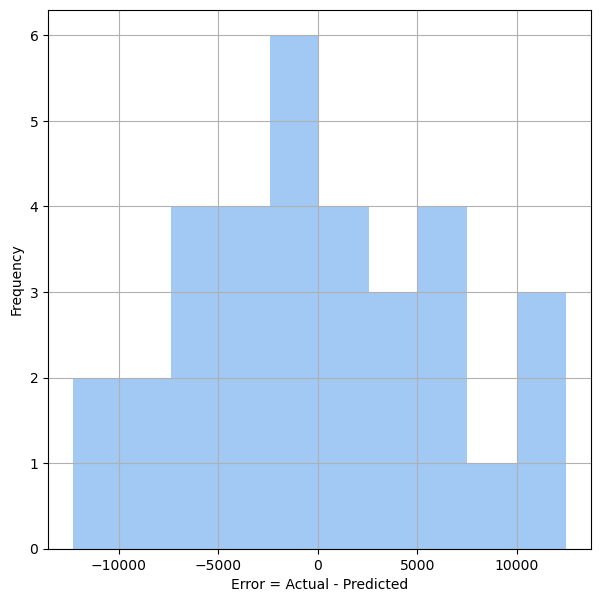

In [87]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

<Axes: xlabel='Actual_Values', ylabel='Predicted_Values'>

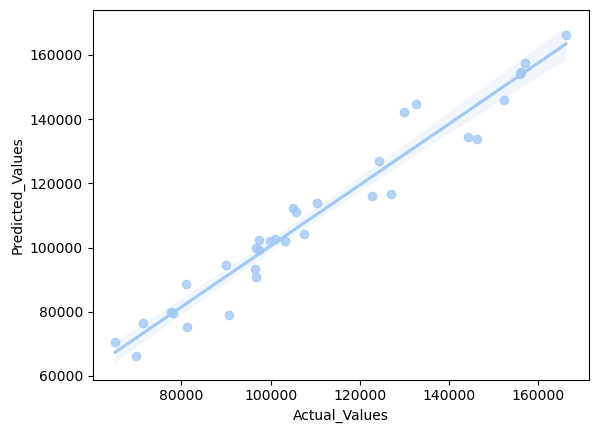

In [88]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model)

In [89]:
Predicted_Test = linear_regressor.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Pct)) 

# Accuracy

print("Accuracy on train data is: ", 100 - MAPE  )
print('\nAccuracy on test data is: ', 100 - np.mean(Model.Error_Pct))

The mean square value of error test is:  46870478.190734394

The mean square value of error train is:  38621940.32406032
The root mean square value of error test is:  6846.201734592284

root mean square value of error train is:  6214.655286020321
The mean absolute percentage error (of test) is:  4.93875955789208

The mean absolute percentage error (of train) is:  4.79914573314759
Accuracy on train data is:  95.06124044210792

Accuracy on test data is:  95.20085426685242


In [90]:
from sklearn.linear_model import Lasso
L = Lasso()
L.fit(Train_X, Train_Y)
print('The lasso score is: ', L.score(Train_X, Train_Y) * 100)

The lasso score is:  95.12253070566918


In [91]:
Model = pd.DataFrame ( )
Model['Predicted_Values'] = L.predict(Train_X)
Model['Actual_Values'] = Train_Y
Model['Error'] = Train_Y - Model['Predicted_Values']
Model['Absolute_Error'] = np.abs(Model.Error)
Model['Error_Percentage'] = np.abs((Model['Error'] * 100) / Train_Y)
Model = Model.sort_values('Error_Percentage', ascending = False)
Model

,Predicted_Values,Actual_Values,Error,Absolute_Error,Error_Percentage
22,78911.951558,90708.19,11796.238442,11796.238442,13.004601
24,142225.562817,129917.04,-12308.522817,12308.522817,9.474140
11,88515.329080,81005.76,-7509.569080,7509.569080,9.270414
6,144845.128737,132602.65,-12242.478737,12242.478737,9.232454
4,133648.499035,146121.95,12473.450965,12473.450965,8.536329
30,70640.941391,65200.33,-5440.611391,5440.611391,8.344454
1,116661.296832,126992.93,10331.633168,10331.633168,8.135597
13,75178.868893,81229.06,6050.191107,6050.191107,7.448309
3,76538.403685,71498.49,-5039.913685,5039.913685,7.048979
18,112370.332454,105008.31,-7362.022454,7362.022454,7.010895


In [92]:
print("The mean of the error is: ", np.mean(Model.Error))
print("\nThe mean of absolute error is: ", np.mean(Model.Absolute_Error))

The mean of the error is:  3.527737025058631e-12

The mean of absolute error is:  5062.836881635036


(array([2., 2., 4., 4., 6., 4., 3., 4., 1., 3.]),
 array([-12308.52281677,  -9830.32543857,  -7352.12806037,  -4873.93068217,
         -2395.73330396,     82.46407424,   2560.66145244,   5038.85883064,
          7517.05620885,   9995.25358705,  12473.45096525]),
 <BarContainer object of 10 artists>)

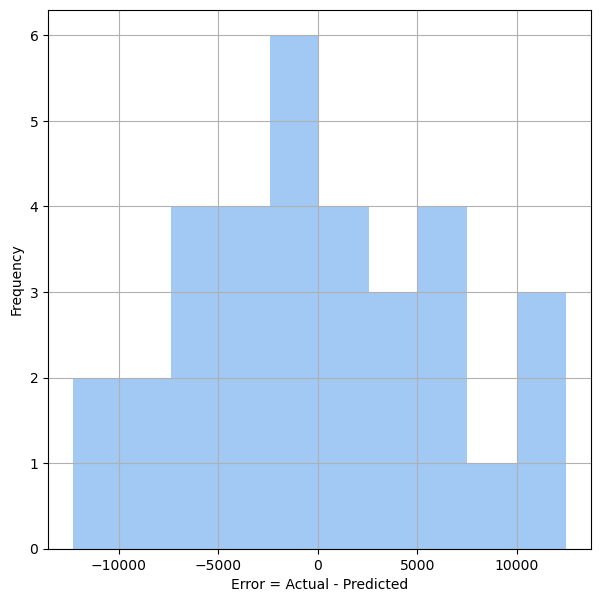

In [93]:
plt.figure(figsize = (7, 7))
plt.xlabel('Error = Actual - Predicted')
plt.ylabel('Frequency')
plt.grid()
plt.hist(x = Model.Error)

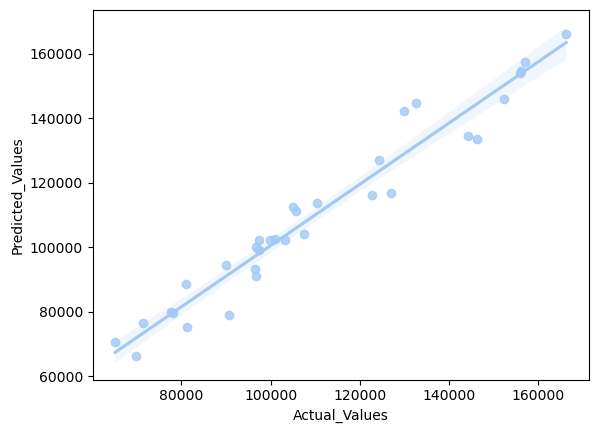

In [94]:
sns.regplot(x = Model.Actual_Values, y = Model.Predicted_Values, data = Model);

In [101]:
Predicted_Test = L.predict(Test_X)
Error_Test = Test_Y - Predicted_Test
Error_Test_Percentage = abs(Error_Test) * 100 / Test_Y 

# MSE

MSE = np.mean(np.square(Error_Test ))
print("The mean square value of error test is: ", MSE)
print("\nThe mean square value of error train is: ", np.mean(np.square(Model.Error)))

# RMSE

RMSE = np.sqrt(MSE)
print("The root mean square value of error test is: ", RMSE )
print("\nroot mean square value of error train is: ", np.sqrt(np.mean(np.square(Model.Error))))

# MAPE

MAPE = np.mean(Error_Test_Percentage)
print("The mean absolute percentage error (of test) is: ", MAPE)
print("\nThe mean absolute percentage error (of train) is: " , np.mean(Model.Error_Percentage)) 

# Accuracy

print("\nAccuracy on train data is: ", 100 - MAPE  )
print('Accuracy on test data is: ', 100 - np.mean(Model.Error_Percentage))

The mean square value of error test is:  46873779.65184138

The mean square value of error train is:  38621941.959587194
The root mean square value of error test is:  6846.442846605921

root mean square value of error train is:  6214.65541760661
The mean absolute percentage error (of test) is:  4.939014047047692

The mean absolute percentage error (of train) is:  4.798985320200622

Accuracy on train data is:  95.06098595295231
Accuracy on test data is:  95.20101467979939


In [99]:
from sklearn.linear_model import Ridge
R = Ridge()
R.fit(Train_X, Train_Y)
print('The ridge score is: ', R.score(Train_X, Train_Y) * 100)

The ridge score is:  95.12248817963841
